In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd


In [2]:
DOWNLOAD_ROOT =  "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


In [ ]:
#Fetching data

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
     os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)


In [5]:
fetch_housing_data()
housing=load_housing_data()

In [ ]:
# quick look at the data

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


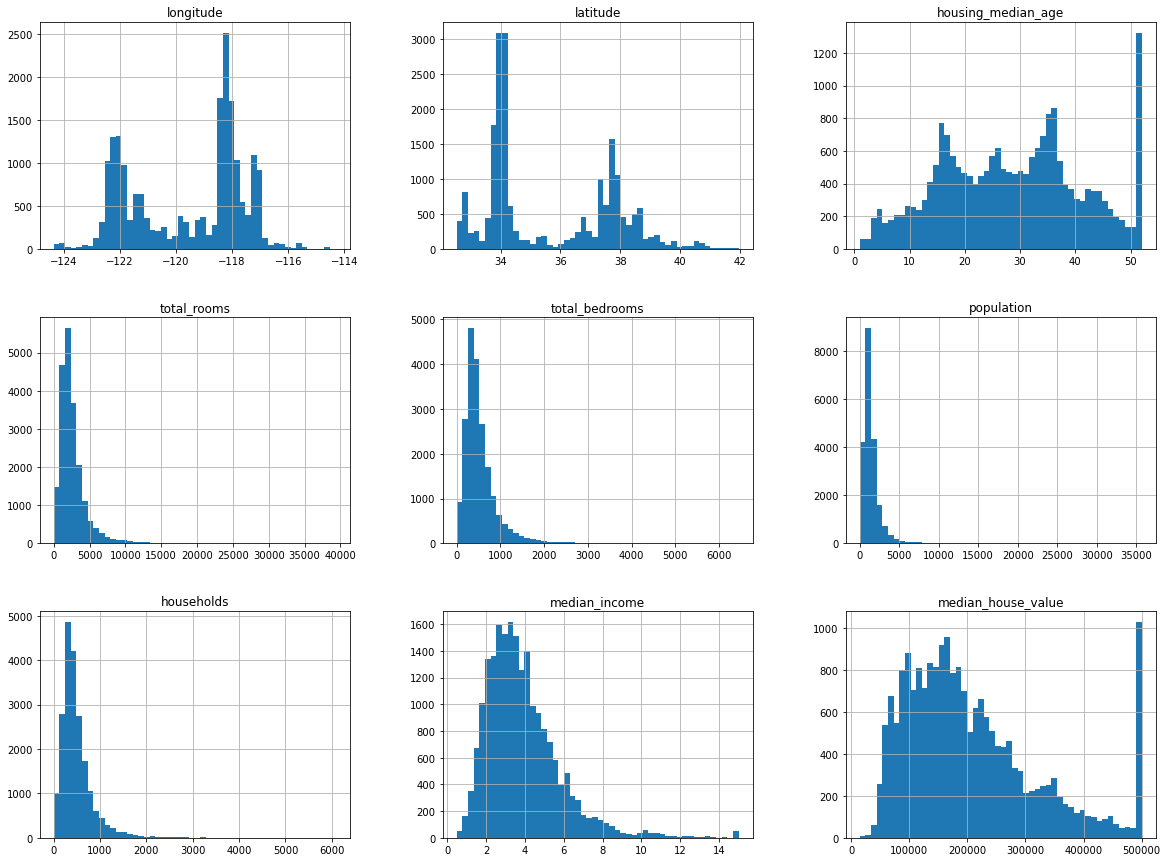

In [10]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
import numpy as np
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


In [ ]:
#CREATING A TEST SET

In [12]:
train_set,test_set=split_train_test(housing,0.2)
print(len(train_set))
len(test_set)

16512


4128

In [13]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])


<AxesSubplot:>

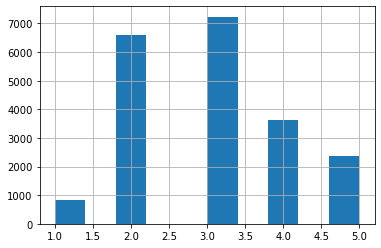

In [14]:
housing["income_cat"].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [16]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [17]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)
    

In [18]:
housing=strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

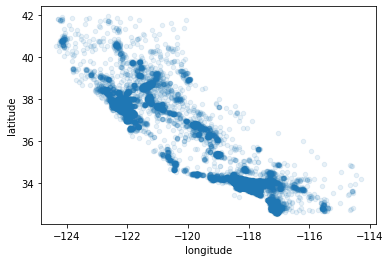

In [19]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

In [ ]:
#VISUALIZING HIGH DENSITY AREAS

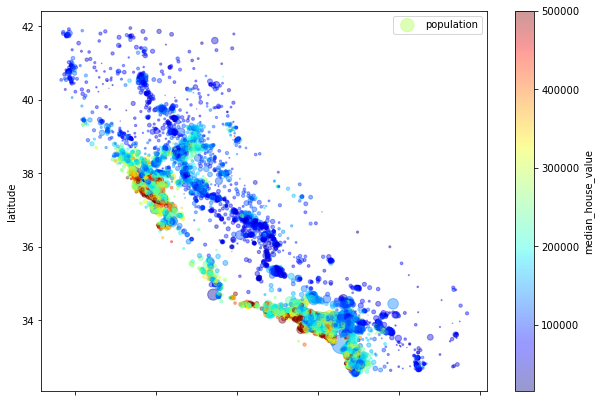

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


In [21]:
corr_matrix=housing.corr()

In [ ]:
#LOOKING FOR CORRELATIONS

In [22]:
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms'

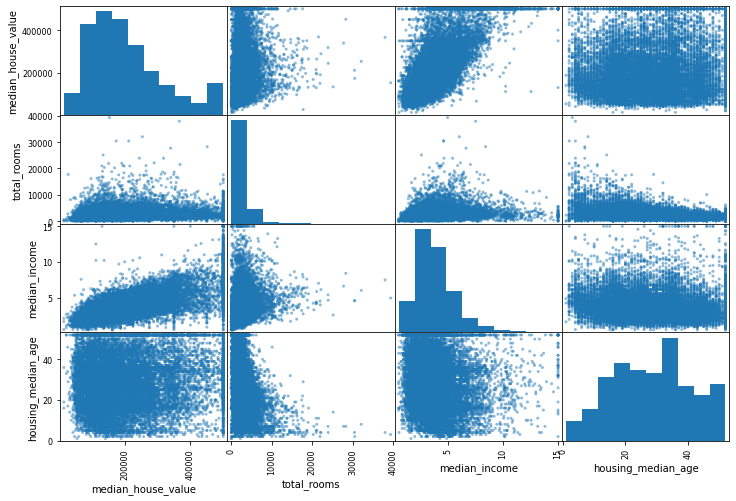

In [23]:

from pandas.plotting import scatter_matrix
attributes=["median_house_value","total_rooms","median_income","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

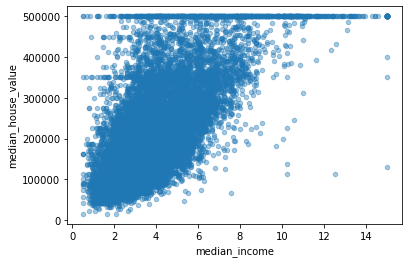

In [24]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha = 0.4)

In [25]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [26]:
corr_matrix=housing.corr()
print(corr_matrix)

                          longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.924478           -0.105848   
latitude                  -0.924478  1.000000            0.005766   
housing_median_age        -0.105848  0.005766            1.000000   
total_rooms                0.048871 -0.039184           -0.364509   
total_bedrooms             0.076598 -0.072419           -0.325047   
population                 0.108030 -0.115222           -0.298710   
households                 0.063070 -0.077647           -0.306428   
median_income             -0.019583 -0.075205           -0.111360   
median_house_value        -0.047432 -0.142724            0.114110   
rooms_per_household       -0.028345  0.107621           -0.147186   
bedrooms_per_room          0.095603 -0.116884            0.136788   
population_per_household  -0.000410  0.005420            0.015031   

                          total_rooms  total_bedrooms  population  households  \
longitude            

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [28]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [ ]:
#CLEANING AND PREPROCESSING

In [29]:
housing.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [31]:
housing_num=housing.drop("ocean_proximity",axis=1)

In [32]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
X=imputer.transform(housing_num)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)


In [35]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()

In [ ]:
#APPLYING ORDINAL ENCODER

In [36]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [37]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [38]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [ ]:
#TRANSFORMER PIPELINE

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

In [42]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
#MODEL TRAINING

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)


LinearRegression()

In [44]:
some_data=housing.iloc[:10]
some_labels=housing_labels.iloc[:10]
some_data_prepared=full_pipeline.transform(some_data)
print("prediction",lin_reg.predict(some_data_prepared))


prediction [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879 154295.07624519 426711.9315643  228002.94602374
 139801.43738593  30128.00152011]


In [45]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [46]:
from sklearn.tree import DecisionTreeRegressor
dec_reg=DecisionTreeRegressor()
dec_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [47]:
housing_predictions= dec_reg.predict(housing_prepared)
dec_mse=mean_squared_error(housing_labels,housing_predictions)
dec_rmse=np.sqrt(dec_mse)
dec_rmse

0.0

In [ ]:
#CHECKING CROSS VALIDATION SCORES

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dec_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores  = np.sqrt(-scores)

In [49]:
def display_scores(scores):
    print("Scores:",scores)
    print("mean:",scores.mean())
    print("Standard deviation:",scores.std())
display_scores(tree_rmse_scores)

Scores: [68655.44844459 65806.02558882 69417.30570593 68898.56569695
 70546.01802397 75251.01701404 71955.61690149 69514.26617508
 77071.56041312 69059.47329665]
mean: 70617.52972606398
Standard deviation: 3161.6411580027407


In [50]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_scores = np.sqrt(-lin_scores)
display_scores(lin_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean: 69052.46136345083
Standard deviation: 2731.674001798346


In [51]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [52]:
forest_reg.predict(housing_prepared)

array([256102.  , 331976.01, 224230.  , ..., 101247.  , 211356.  ,
       470223.73])

In [53]:
housing_predictions_forest_reg= forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_predictions_forest_reg)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18819.301753786385

In [54]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_scores = np.sqrt(-forest_scores)
display_scores(forest_scores)

Scores: [49180.53459664 47455.36302805 49972.94010411 52383.11483732
 49997.1158386  53777.83174939 48907.7056236  47619.99304294
 52835.41379723 50344.32971097]
mean: 50247.434232884574
Standard deviation: 2037.2071066273325


In [ ]:
#FINE TUNING MODEL, APPLYING GRID SEARCH

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid= [
    {'n_estimators' :[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()
grid_search =  GridSearchCV(forest_reg,param_grid,cv=5,scoring = 'neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [64]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [66]:
cvres = grid_search.cv_results_

In [67]:
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64611.722627883166 {'max_features': 2, 'n_estimators': 3}
54861.82023873922 {'max_features': 2, 'n_estimators': 10}
52702.852428057886 {'max_features': 2, 'n_estimators': 30}
60780.60142637735 {'max_features': 4, 'n_estimators': 3}
53056.51844275536 {'max_features': 4, 'n_estimators': 10}
50631.05829399582 {'max_features': 4, 'n_estimators': 30}
59548.74585809733 {'max_features': 6, 'n_estimators': 3}
52174.80462582368 {'max_features': 6, 'n_estimators': 10}
50081.39335799421 {'max_features': 6, 'n_estimators': 30}
58455.642296646154 {'max_features': 8, 'n_estimators': 3}
51885.75704701057 {'max_features': 8, 'n_estimators': 10}
50392.45073667272 {'max_features': 8, 'n_estimators': 30}
62958.14957971935 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54263.3127848495 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59439.09314249842 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52483.11155541372 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.69842090e-02, 7.22773469e-02, 4.07022625e-02, 1.68246910e-02,
       1.53556024e-02, 1.69190679e-02, 1.54763959e-02, 3.16273847e-01,
       5.91437064e-02, 1.10606888e-01, 7.68411387e-02, 9.79891248e-03,
       1.66322313e-01, 9.69197250e-05, 2.71848012e-03, 3.65821896e-03])

In [69]:
extra_attribs =["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes =  num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse= True)


[(0.3162738471112531, 'median_income'),
 (0.1663223133156213, 'INLAND'),
 (0.11060688752648373, 'pop_per_hhold'),
 (0.07698420902292744, 'longitude'),
 (0.07684113872979347, 'bedrooms_per_room'),
 (0.07227734689862139, 'latitude'),
 (0.05914370643341861, 'rooms_per_hhold'),
 (0.04070226246761564, 'housing_median_age'),
 (0.016919067889164082, 'population'),
 (0.016824690992305526, 'total_rooms'),
 (0.015476395930583644, 'households'),
 (0.015355602396825731, 'total_bedrooms'),
 (0.009798912477793638, '<1H OCEAN'),
 (0.003658218963953459, 'NEAR OCEAN'),
 (0.0027184801186490456, 'NEAR BAY'),
 (9.691972499024094e-05, 'ISLAND')]

In [ ]:
#EVALUATING TEST SET

In [72]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48100.22462203688

In [75]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale = stats.sem(squared_errors)))

array([46071.58836801, 50046.69781943])